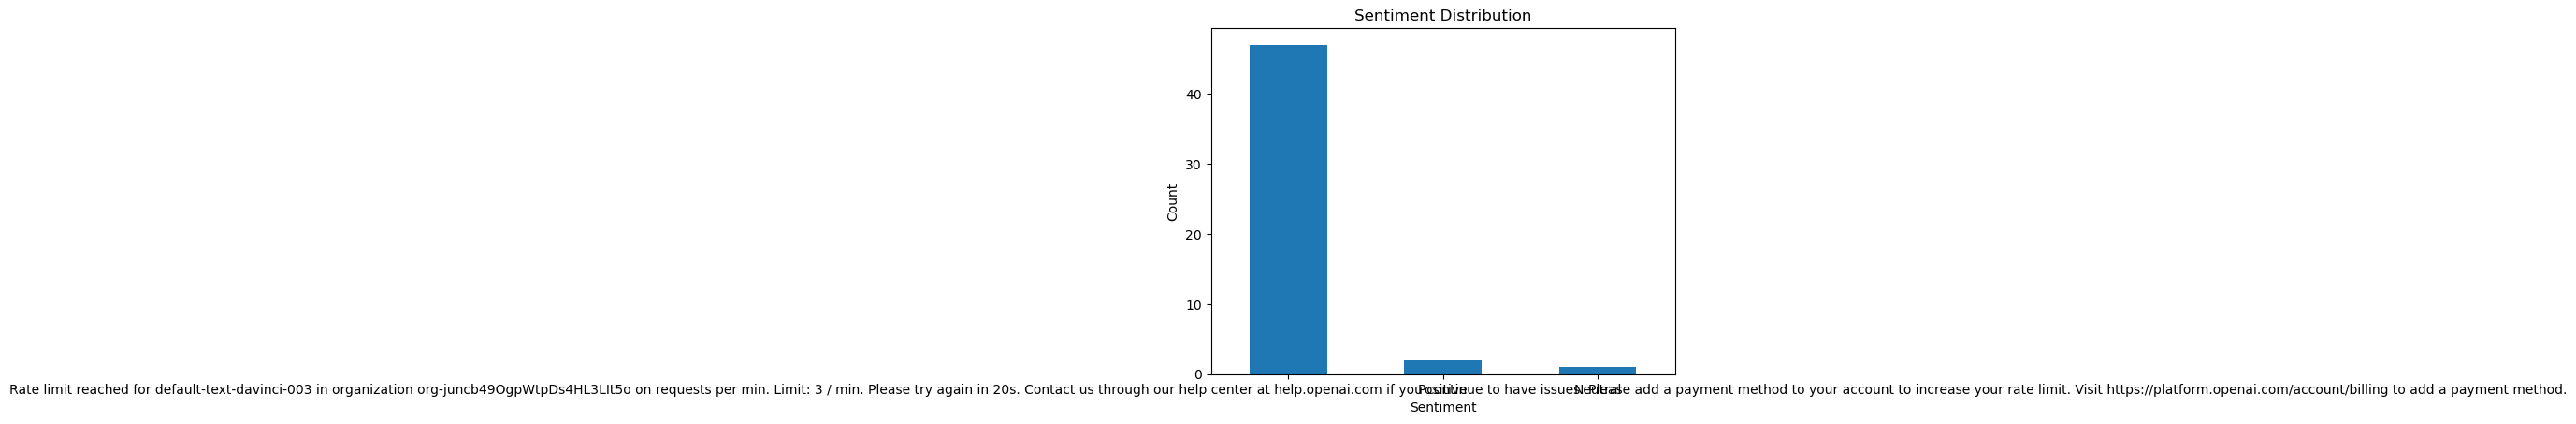

In [1]:
import pandas as pd
import openai
import os
import matplotlib.pyplot as plt
openai.api_key = os.environ["OPENAI_API_KEY"]
df = pd.read_csv('Reviews.csv')
df = df.head(50)
def analyze_sentiment(review_text):
    try:
        response = openai.Completion.create(
            engine="text-davinci-003",
            prompt=f"Analyze the sentiment of the following text like positive,negative or neutral: '{review_text}'\nSentiment:",
            max_tokens=1,
        )
        generated_sentiment = response.choices[0].text.strip()
        return generated_sentiment
    except Exception as e:
        return str(e)
    
df['Sentiment'] = df['Text'].apply(analyze_sentiment)

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)  
plt.show()

In [17]:
df.shape

(50, 11)

In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Neutral
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Rate limit reached for default-text-davinci-00...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Rate limit reached for default-text-davinci-00...
